# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Andreas Bimoseno Kuma
- **Email:** kuma24@student.ub.ac.id
- **ID Dicoding:** dreinma

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Apakah ada hari-hari dengan lonjakan penggunaan sepeda yang tidak biasa?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import plotly.express as px

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("../Streamlit_Dashboard/data/data_1.csv", parse_dates=["dteday"])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("../Streamlit_Dashboard/data/data_2.csv", parse_dates=["dteday"])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset berisi 2 file day & hour
- terdapat 15 kolom dari kedua file data

### Assessing Data

In [4]:
day_df.info()
print()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Duplikasi data per hari: ", day_df.duplicated().sum(), "\n")
print("Duplikasi data per jam : ", hour_df.duplicated().sum())

Duplikasi data per hari:  0 

Duplikasi data per jam :  0


In [8]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [9]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


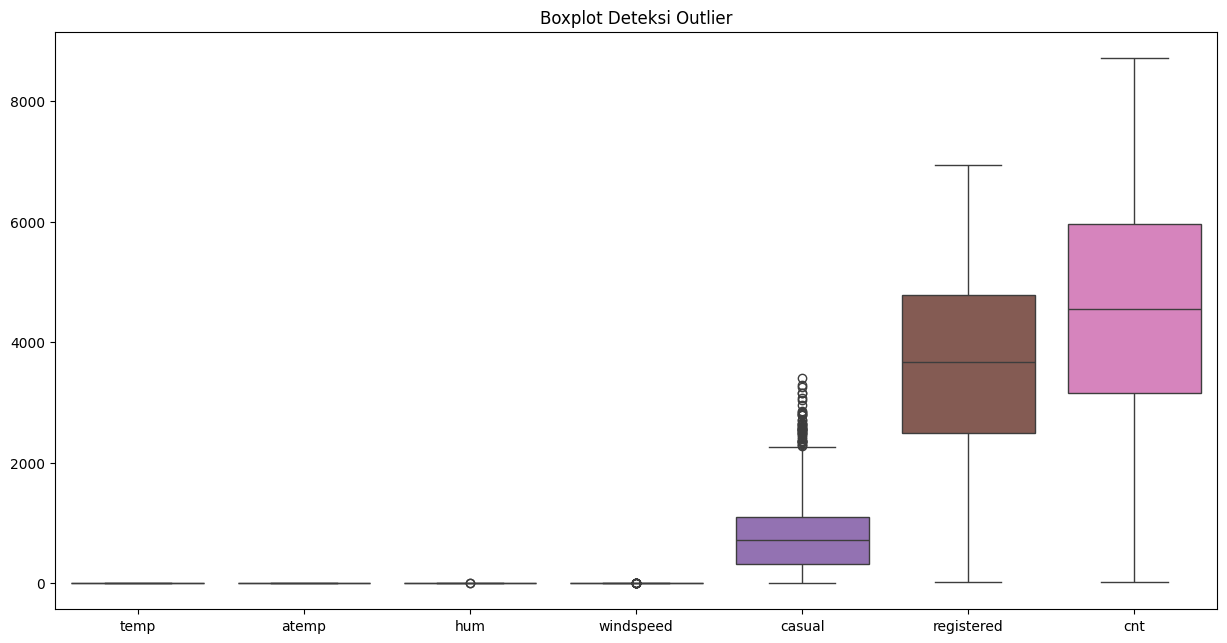

In [10]:
#cek outlier data day
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(15,7.5))
sns.boxplot(data=day_df[num_cols])
plt.title("Boxplot Deteksi Outlier")
plt.show()

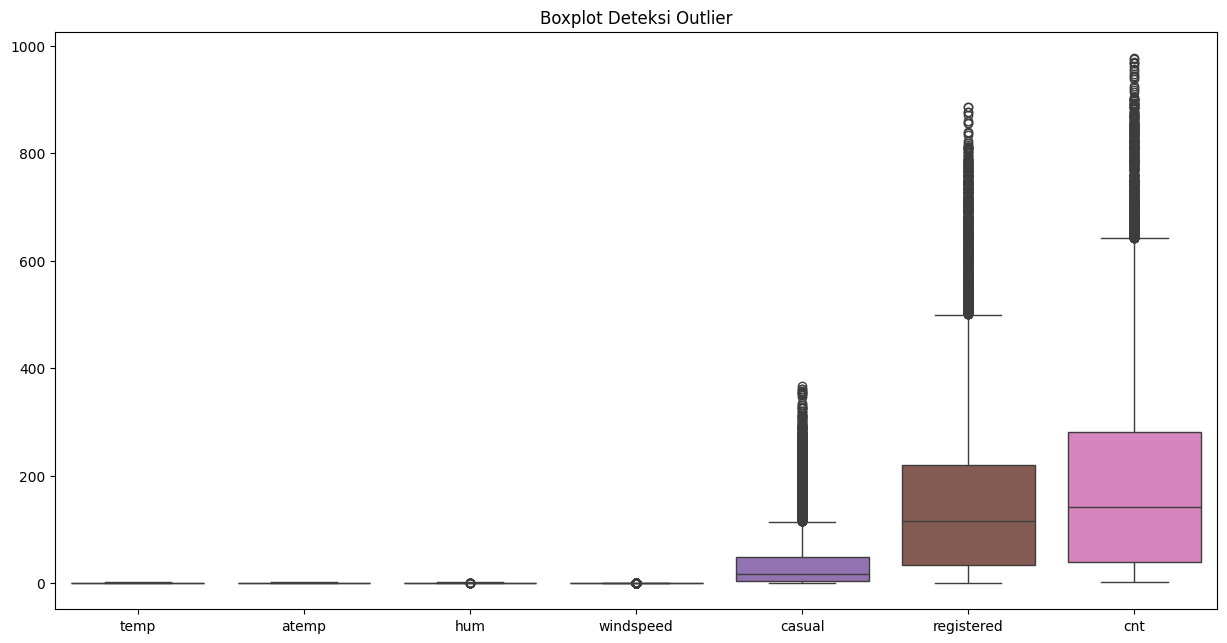

In [11]:
#cek outlier data hour
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(15,7.5))
sns.boxplot(data=hour_df[num_cols])
plt.title("Boxplot Deteksi Outlier")
plt.show()

In [12]:
Q1_hour   = hour_df[num_cols].quantile(0.25)
Q3_hour   = hour_df[num_cols].quantile(0.75)
IQR_hour  = Q3_hour - Q1_hour
outlier_condition_hour = ((hour_df[num_cols] < (Q1_hour - 1.5 * IQR_hour)) | (hour_df[num_cols] > (Q3_hour + 1.5 * IQR_hour))).sum()
print("\nJumlah Outlier per Kolom:\n", outlier_condition_hour)


Jumlah Outlier per Kolom:
 temp             0
atemp            0
hum             22
windspeed      342
casual        1192
registered     680
cnt            505
dtype: int64


**Insight:**
- data tidak ada duplikat
- tidak ada missing value dalam data  
- pada file day_df memiliki 3 kolom yang memiliki outlier
- pada file hour_df memiliki 5 kolom yang memiliki outlier
- kolom casual menjadi kolom dengan outlier terbanyak

### Cleaning Data

In [13]:
# cek duplikasi data

print("Jumlah duplikasi: ", day_df.duplicated().sum(), "\n")
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

#tidak ada duplikasi maka tak perlu hapus duplikasi data

Jumlah duplikasi:  0 

Jumlah duplikasi:  0


In [14]:
# cek missing value

day_df.isna().sum()

#tak ada missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
# cek missing value

hour_df.isna().sum()

#tidak ada missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
# cek inaccurate value

num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in num_cols:
  print(f"nilai maksimum kolom {col}:")
  print(hour_df[hour_df[col] == hour_df[col].max()][['instant', 'dteday', col]], "\n\n")

# tidak ada data yang inaccurate value

nilai maksimum kolom temp:
       instant     dteday  temp
13163    13164 2012-07-07   1.0 


nilai maksimum kolom atemp:
      instant     dteday  atemp
4768     4769 2011-07-22    1.0 


nilai maksimum kolom hum:
       instant     dteday  hum
26          27 2011-01-02  1.0
721        722 2011-02-02  1.0
786        787 2011-02-05  1.0
787        788 2011-02-05  1.0
789        790 2011-02-05  1.0
...        ...        ...  ...
16865    16866 2012-12-10  1.0
16866    16867 2012-12-10  1.0
17025    17026 2012-12-17  1.0
17319    17320 2012-12-29  1.0
17320    17321 2012-12-29  1.0

[270 rows x 3 columns] 


nilai maksimum kolom windspeed:
      instant     dteday  windspeed
4315     4316 2011-07-03     0.8507
4316     4317 2011-07-03     0.8507 


nilai maksimum kolom casual:
       instant     dteday  casual
10477    10478 2012-03-17     367 


nilai maksimum kolom registered:
       instant     dteday  registered
14773    14774 2012-09-12         886 


nilai maksimum kolom cnt:
     

In [17]:
#cek outlier dalam data day
Q1   = day_df[num_cols].quantile(0.25)
Q3   = day_df[num_cols].quantile(0.75)
IQR  = Q3 - Q1
outlier_condition = ((day_df[num_cols] < (Q1- 1.5 * IQR)) | (day_df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nJumlah Outlier per Kolom:\n", outlier_condition)


Jumlah Outlier per Kolom:
 temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64


In [18]:
# proses imputasi data day kolom casual, hum, dan windspeed

cols_with_outliers = ['casual', 'hum', 'windspeed']

for col in cols_with_outliers:
    Q1 = day_df[col].quantile(0.25)
    Q3 = day_df[col].quantile(0.75)
    IQR = Q3 - Q1

    max = float(Q3 + (1.5 * IQR))
    min = float(Q1 - (1.5 * IQR))

    day_df.loc[day_df[col] > max, col] = max
    day_df.loc[day_df[col] < min, col] = min

C:\Users\Kuma\AppData\Local\Temp\ipykernel_45368\2593824777.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2266.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df[col] > max, col] = max


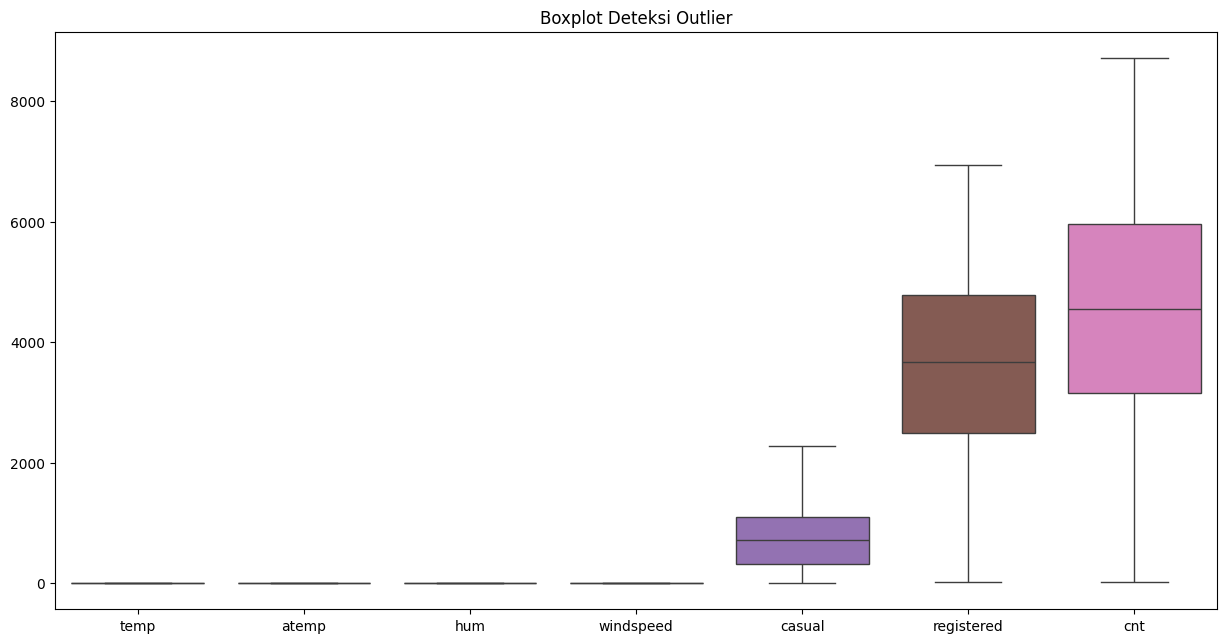

In [19]:
#o utlier data day telah dilakukan imputasi
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(15,7.5))
sns.boxplot(data=day_df[num_cols])
plt.title("Boxplot Deteksi Outlier")
plt.show()

In [20]:
# cek outlier dalam data day setelah imputasi
Q1   = day_df[num_cols].quantile(0.25)
Q3   = day_df[num_cols].quantile(0.75)
IQR  = Q3 - Q1
outlier_condition = ((day_df[num_cols] < (Q1- 1.5 * IQR)) | (day_df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nJumlah Outlier per Kolom:\n", outlier_condition)


Jumlah Outlier per Kolom:
 temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [21]:
# cek outlier data hour
Q1   = hour_df[num_cols].quantile(0.25)
Q3   = hour_df[num_cols].quantile(0.75)
IQR  = Q3 - Q1
outlier_condition = ((hour_df[num_cols] < (Q1- 1.5 * IQR)) | (hour_df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nJumlah Outlier per Kolom:\n", outlier_condition)


Jumlah Outlier per Kolom:
 temp             0
atemp            0
hum             22
windspeed      342
casual        1192
registered     680
cnt            505
dtype: int64


In [22]:
# proses imputasi data hour kolom hum, windspeed, casual, registered, dan cnt

cols_with_outliers = ['hum','windspeed','casual','registered', 'cnt']

for col in cols_with_outliers:
    Q1 = hour_df[col].quantile(0.25)
    Q3 = hour_df[col].quantile(0.75)
    IQR = Q3 - Q1

    max = float(Q3 + (1.5 * IQR))
    min = float(Q1 - (1.5 * IQR))

    hour_df.loc[hour_df[col] > max, col] = max
    hour_df.loc[hour_df[col] < min, col] = min

C:\Users\Kuma\AppData\Local\Temp\ipykernel_45368\4282643614.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '642.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[hour_df[col] > max, col] = max


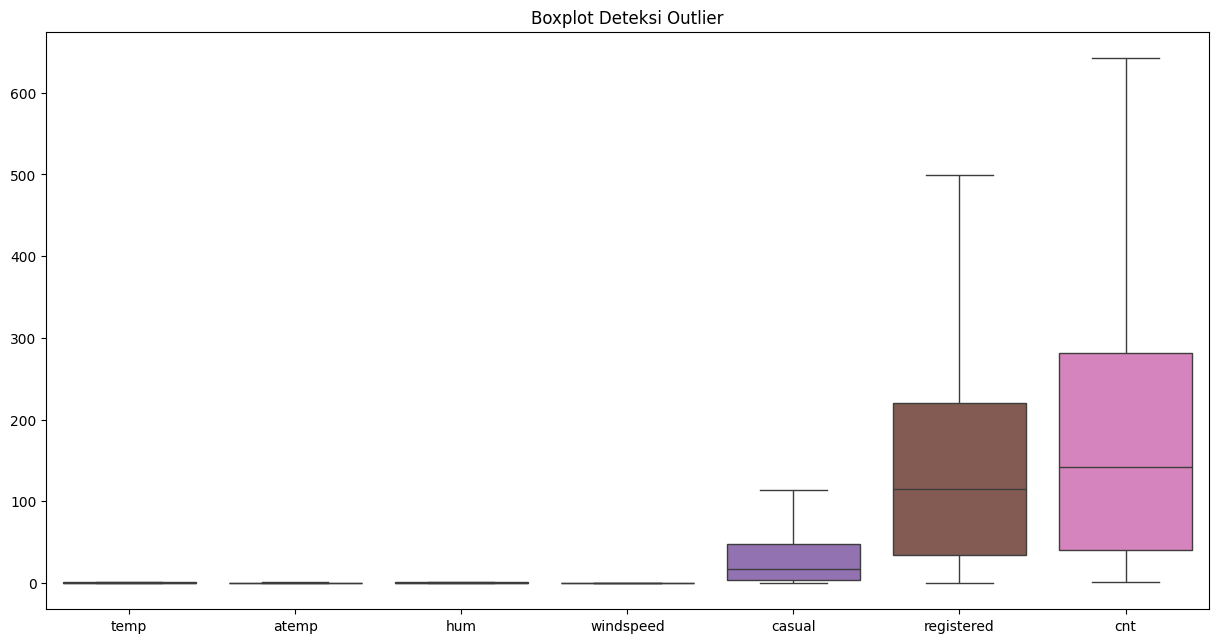

In [23]:
#outlier data hour telah dilakukan imputasi
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(15,7.5))
sns.boxplot(data=hour_df[num_cols])
plt.title("Boxplot Deteksi Outlier")
plt.show()

In [24]:
# cek outlier data hour setelah imputasi

Q1   = hour_df[num_cols].quantile(0.25)
Q3   = hour_df[num_cols].quantile(0.75)
IQR  = Q3 - Q1
outlier_condition = ((hour_df[num_cols] < (Q1- 1.5 * IQR)) | (hour_df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nJumlah Outlier per Kolom:\n", outlier_condition)


Jumlah Outlier per Kolom:
 temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- data cenderung bersih dan hanya memiliki outlier
- beberapa outlier telah dibersihkan dengan imputasi

## Exploratory Data Analysis (EDA)

### Explore Distribusi data

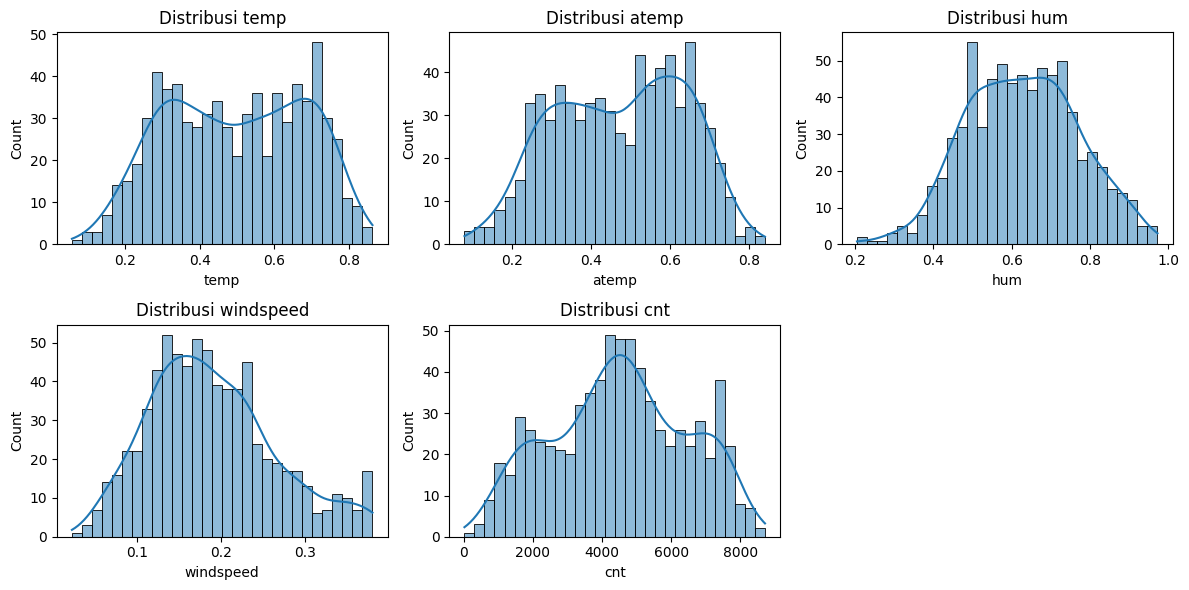

In [25]:
# data per hari
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(day_df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

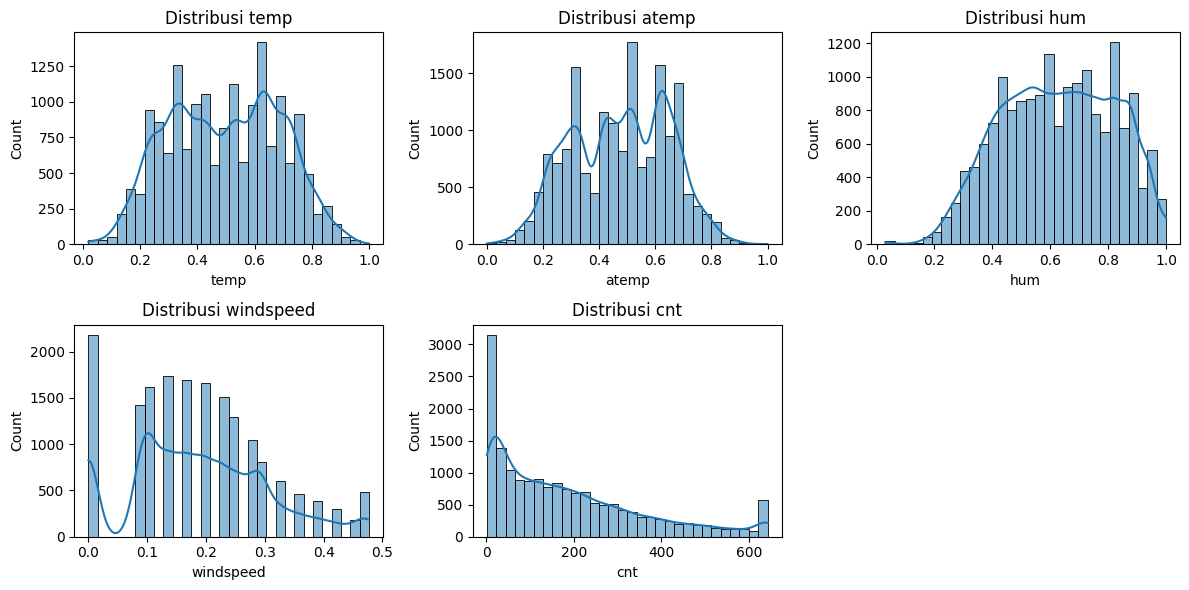

In [26]:
# data per jam
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(hour_df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

### Explore korelasi antar variabel

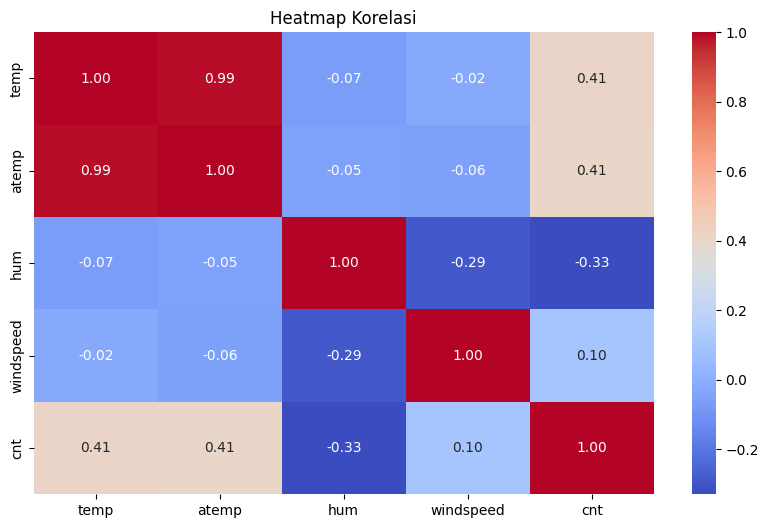

In [27]:
# Heatmap antar fitur data per jam

plt.figure(figsize=(10,6))
sns.heatmap(hour_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

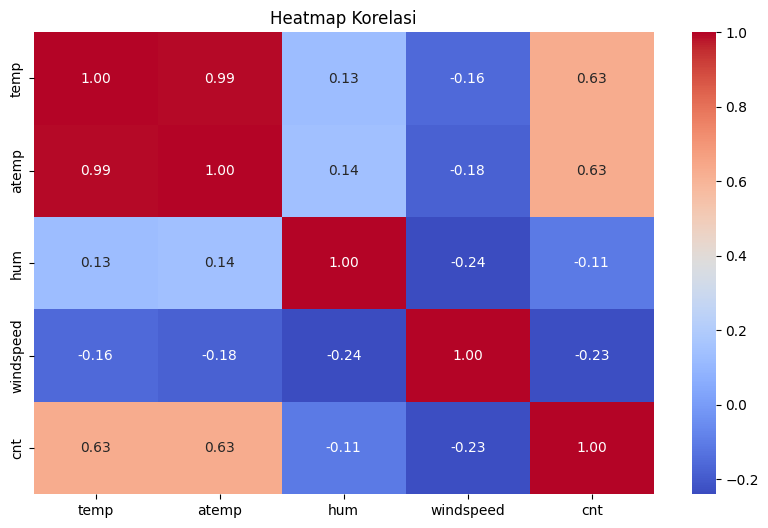

In [28]:
# Heatmap antar fitur data per hari

plt.figure(figsize=(10,6))
sns.heatmap(day_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

### Explore tren peminjaman setiap bulan

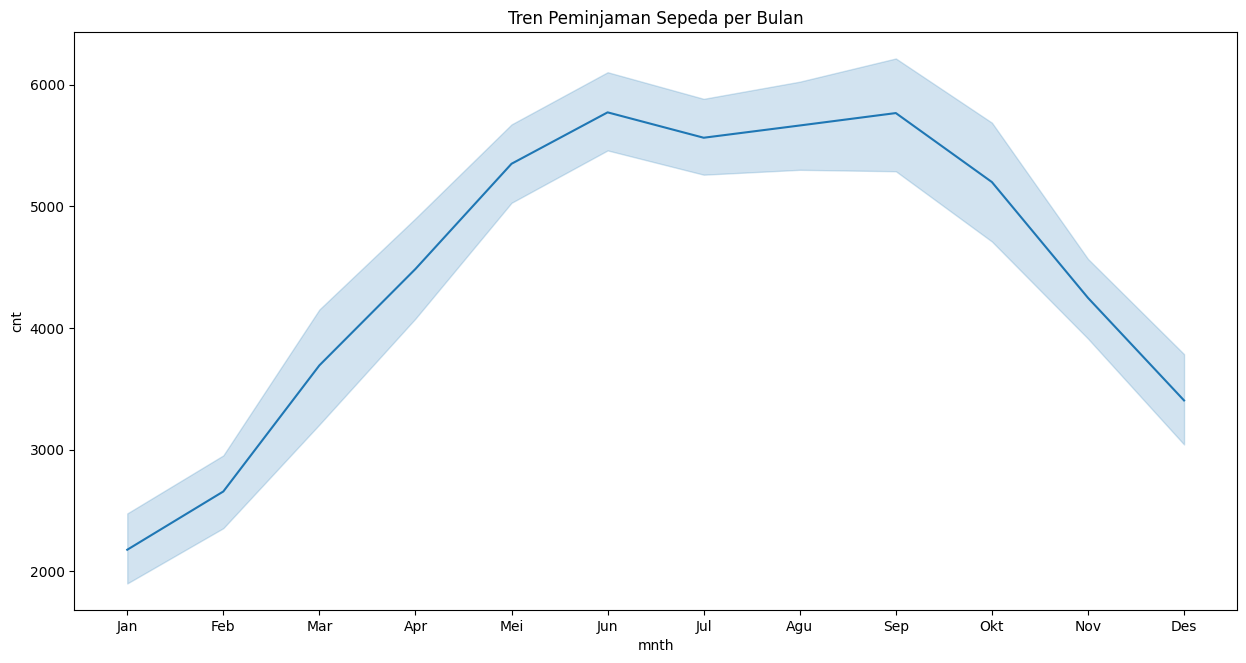

In [29]:
# tren dari data per hari
plt.figure(figsize=(15,7.5))
sns.lineplot(x="mnth", y="cnt", data=day_df)
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.title("Tren Peminjaman Sepeda per Bulan")
plt.show()

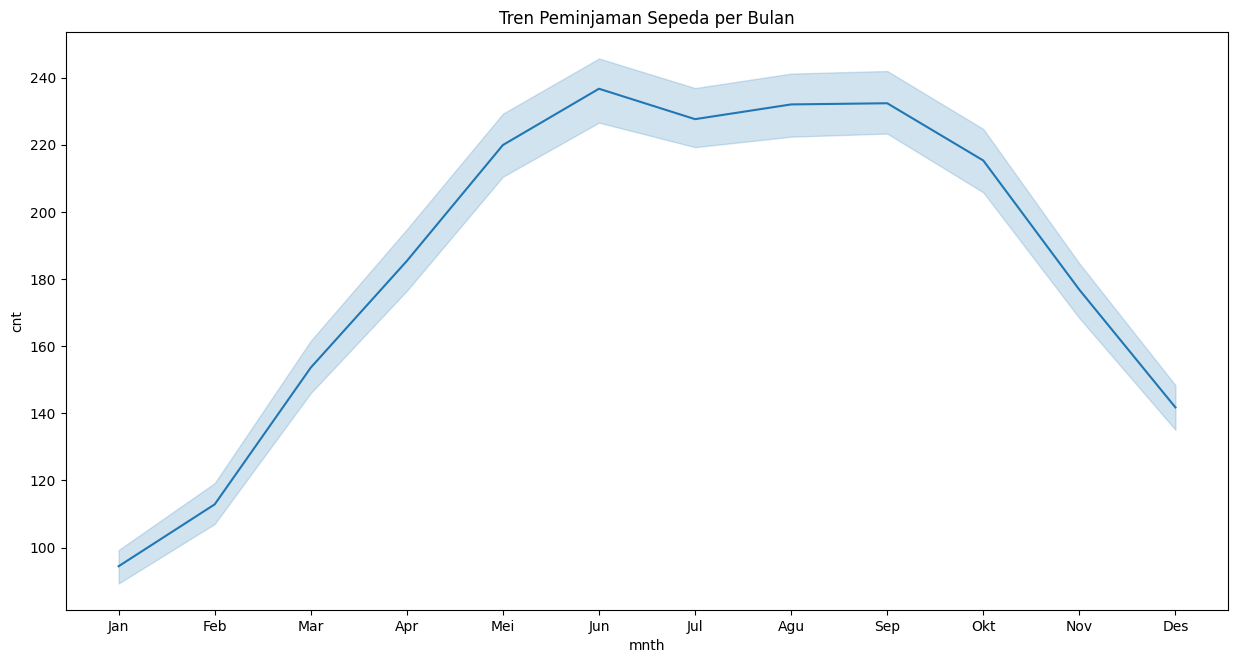

In [30]:
# tren dari data per jam
plt.figure(figsize=(15,7.5))
sns.lineplot(x="mnth", y="cnt", data=hour_df)
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.title("Tren Peminjaman Sepeda per Bulan")
plt.show()

### Explore pengaruh cuaca terhadap peminjaman

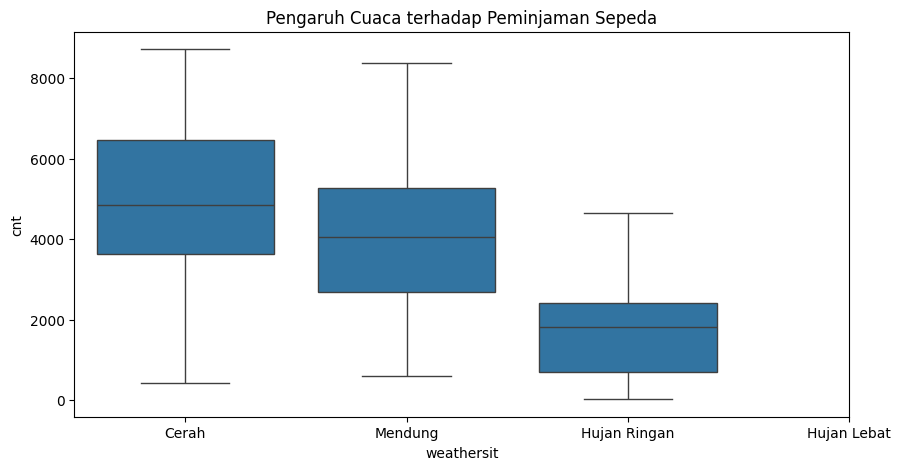

In [31]:
# pada data per hari

plt.figure(figsize=(10,5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.xticks([0, 1, 2, 3], ['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda")
plt.show()

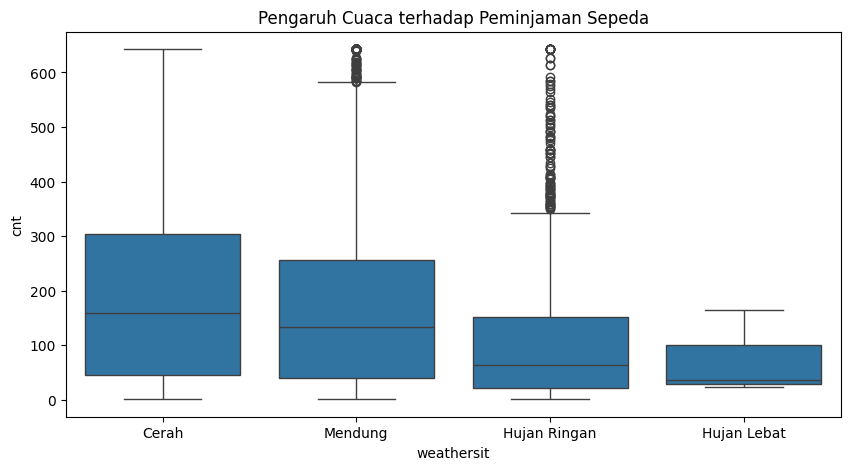

In [32]:
# pada data per jam

plt.figure(figsize=(10,5))
sns.boxplot(x="weathersit", y="cnt", data=hour_df)
plt.xticks([0, 1, 2, 3], ['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda")
plt.show()

### Explore identifikasi lonjakan penggunaan sepeda

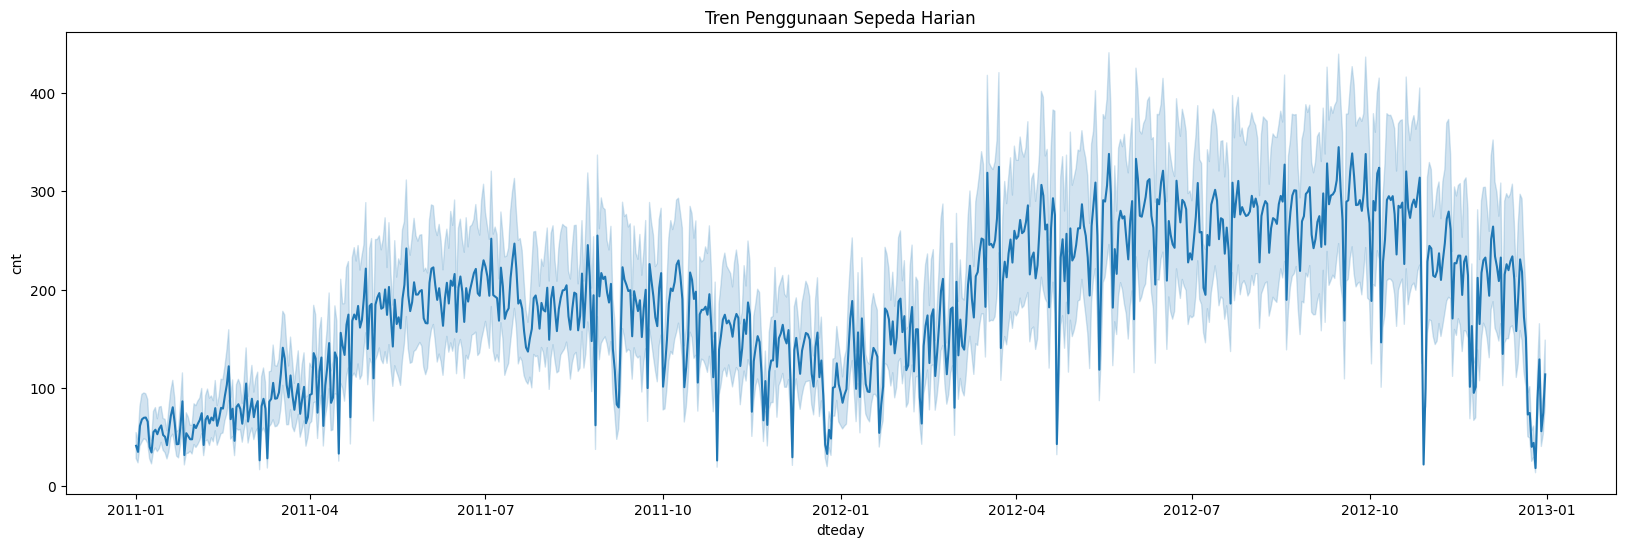

In [33]:
# pada data per jam

plt.figure(figsize=(20,6))
sns.lineplot(x="dteday", y="cnt", data=hour_df)
plt.title("Tren Penggunaan Sepeda Harian")
plt.show()

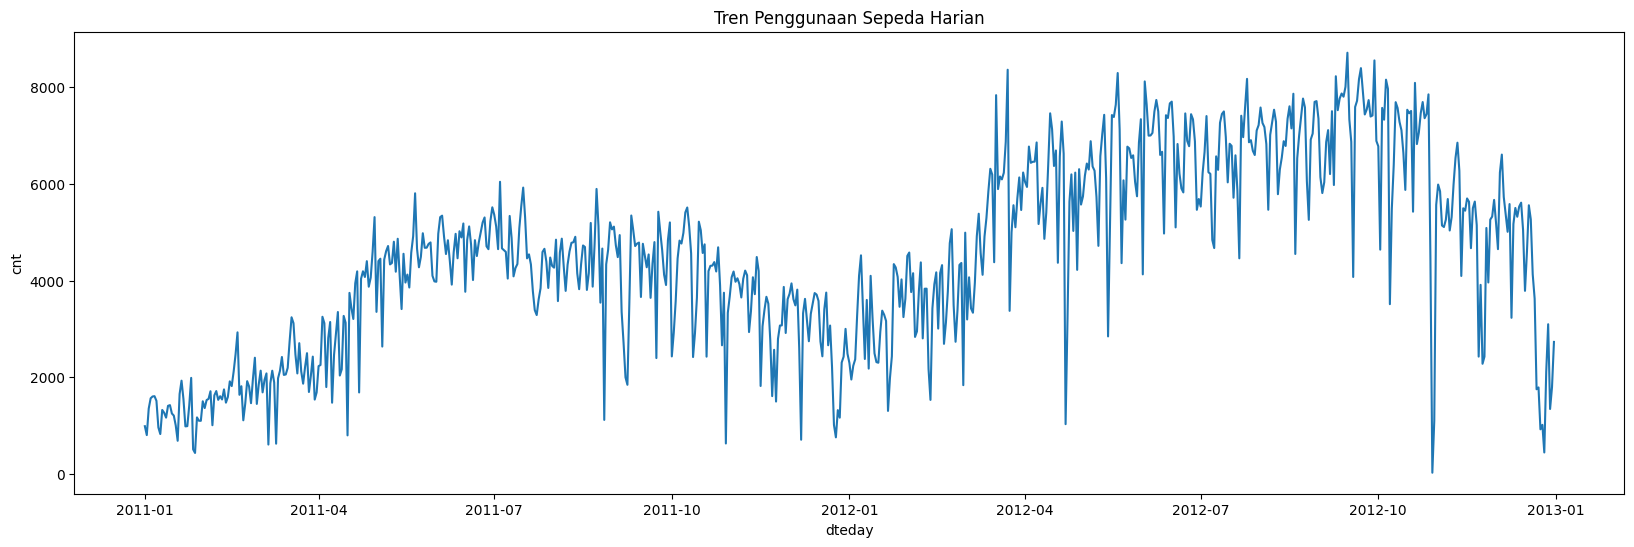

In [34]:
# pada data per hari

plt.figure(figsize=(20,6))
sns.lineplot(x="dteday", y="cnt", data=day_df)
plt.title("Tren Penggunaan Sepeda Harian")
plt.show()

**Insight:**
- Sebagian besar data terlihat memiliki distribusi normal, namun beberapa kolom skewed
- Suhu memiliki korelasi positif kuat dengan jumlah peminjaman sepeda
- Jam sibuk menunjukkan lonjakan peminjaman terutama di hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

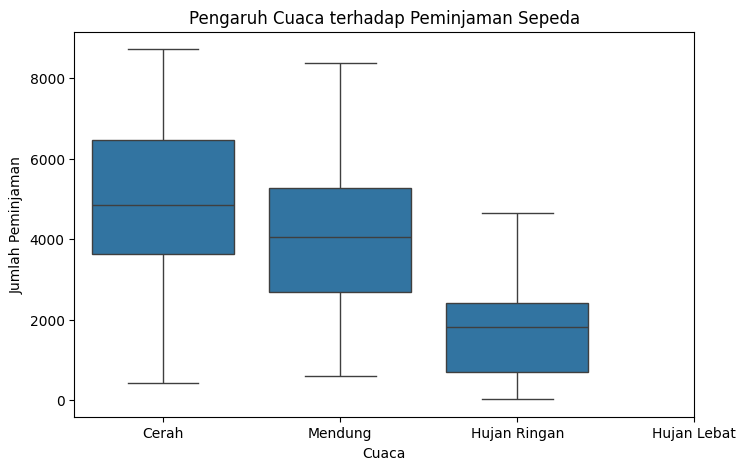

In [35]:
# pada data per hari

plt.figure(figsize=(8, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.xticks([0, 1, 2, 3], ['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda", fontsize=12)
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Peminjaman")

plt.show()

### Pertanyaan 2: Bagaimana pola peminjaman sepeda berdasarkan bulan nya?

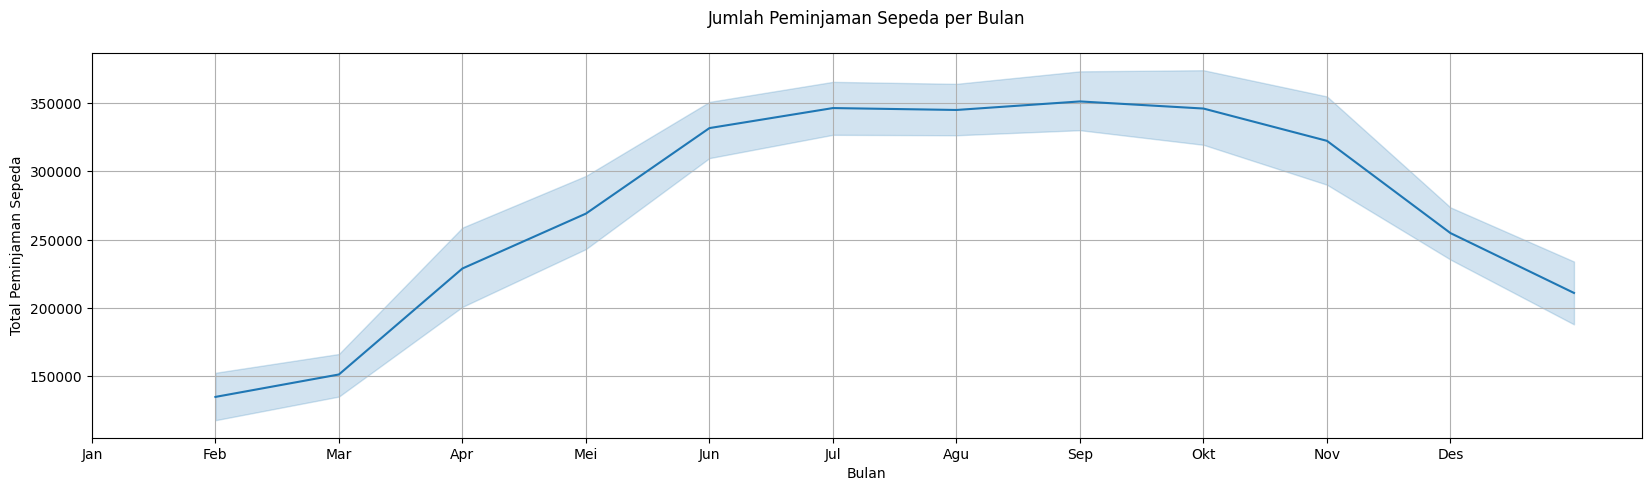

In [36]:
plt.figure(figsize=(20, 5))
sns.lineplot(x="mnth", y="cnt", data=day_df, estimator='sum')

plt.title("Jumlah Peminjaman Sepeda per Bulan\n", fontsize=12)
plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman Sepeda")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True)
plt.show()

**Insight:**
- Cuaca adalah faktor penting dalam peminjaman sepeda.
- pertengahan hingga menuju akhir tahun memilikijumlah peminjaman tertinggi

## Conclusion

- Conclusion pertanyaan no 1: kondisi cuaca sangat mempengaruhi jumlah peminjaman sepeda. Cuaca cerah memiliki jumlah peminjaman tertinggi, sedangkan hujan dan berkabut menunjukkan penurunan signifikan.


- Conclusion pertanyaan no 2: bulan Juni hingga November memiliki peminjaman yang tinggi. Hal ini mungkin disebabkan musim panas, di mana lebih banyak orang menggunakan sepeda untuk transportasi. Sebaliknya, bulan Desember dan Januari memiliki peminjaman terendah, kemungkinan karena cuaca lebih dingin atau lebih banyak hari libur.

In [37]:
day_df.to_csv('day_cleaned.csv', index=False)
print("✅ File 'day_cleaned.csv' berhasil disimpan!")

hour_df.to_csv('hour_cleaned.csv', index=False)
print("✅ File 'hour_cleaned.csv' berhasil disimpan!")


✅ File 'day_cleaned.csv' berhasil disimpan!
✅ File 'hour_cleaned.csv' berhasil disimpan!


In [38]:
day_cleaned = pd.read_csv("day_cleaned.csv", parse_dates=["dteday"])
hour_cleaned = pd.read_csv("hour_cleaned.csv", parse_dates=["dteday"])

# Menambahkan kolom baru ke hour_cleaned untuk menyamakan struktur
hour_cleaned["is_hourly"] = 1  # Menandakan data dari dataset per jam
day_cleaned["is_hourly"] = 0   # Menandakan data dari dataset per hari

# Menggabungkan dataset
merged_df = pd.concat([day_cleaned, hour_cleaned], ignore_index=True)

# Simpan ke CSV
merged_df.to_csv("merged_cleaned.csv", index=False)

print("File merged_cleaned.csv berhasil dibuat!")


File merged_cleaned.csv berhasil dibuat!


In [39]:
merged_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_hourly,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654,985.0,0,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670,801.0,0,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229,1349.0,0,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454,1562.0,0,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518,1600.0,0,NaN


In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     18110 non-null  int64         
 1   dteday      18110 non-null  datetime64[ns]
 2   season      18110 non-null  int64         
 3   yr          18110 non-null  int64         
 4   mnth        18110 non-null  int64         
 5   holiday     18110 non-null  int64         
 6   weekday     18110 non-null  int64         
 7   workingday  18110 non-null  int64         
 8   weathersit  18110 non-null  int64         
 9   temp        18110 non-null  float64       
 10  atemp       18110 non-null  float64       
 11  hum         18110 non-null  float64       
 12  windspeed   18110 non-null  float64       
 13  casual      18110 non-null  float64       
 14  registered  18110 non-null  int64         
 15  cnt         18110 non-null  float64       
 16  is_hourly   18110 non-